# Les types de modèles de propagation

* Le modèle SI est un modèle où il n'y a que deux possibilités : ou bien l'individu est susceptible d'être infecté (S), ou bien il est infecté à vie (I). Cela s'applique par exemple au cas du SIDA. Pour le coronavirus, nous ne l'utiliserons pas.
* Le modèle SIR est un modèle où l'individu peut être guéri du virus, et être donc immunisé (R). Ce modèle s'applique bien au problème du coronavirus, et nous l'avons déjà modélisé.
* Le modèle SIS est un modèle où l'individu peut guérir, mais est alors de nouveau susceptible d'être infecté. Il n'y a pas d'immunité. On va tester ce modèle là, puisque nous n'avons pas la certitude qu'il est impossible de contracter plusieurs fois le coronavirus. 
* Dans le modèle SEIR, il y a un état intermédiaire, exposé (E). Un individu qui a été au contact d'une personne infectée devient infecté avec une certaine probabilité. L'individu peut être susceptible, exposé, infecté puis immunisé.
* Le modèle SEIS est identique au modèle SEIR mais sans immunité.

D'autres caractéristiques peuvent être ajoutées à ces modèles, tels que la possibilité de déceder (D), d'être mis en quarantaine (Q) ou encore d'êre immunisé à la naissance (M).

# Choix d'un modèle de propagation du virus

Je vais donc tester un modèle SIS où les individus qui guérissent du coronavirus sont de nouveau susceptobles de tomber malade.

In [1]:
import datetime
import os
import yaml

import numpy as np
import pandas as pd

In [3]:
# Lecture du fichier d'environnement
ENV_FILE = '..\env.yaml'
with open(ENV_FILE) as f:
    params = yaml.load(f , Loader=yaml.FullLoader)

# Initialisation des chemins vers les fichiers
ROOT_DIR = os.path.dirname(os.path.abspath(ENV_FILE))
DATA_FILE = os.path.join(ROOT_DIR,
                         params['directories']['processed'],
                         params['files']['all_data'])

# Lecture du fichier de données
epidemie_df = (pd.read_csv(DATA_FILE, parse_dates=['Last Update'])
    .assign(day=lambda _df: _df['Last Update'].dt.date)
               .drop_duplicates(subset=['Country/Region', 'Province/State', 'day'])
               [lambda df: df['day'] <= datetime.date(2020, 3, 12)]
    )

In [4]:
epidemie_df =epidemie_df.groupby(['Country/Region', 'day']).sum()
epidemie_df['Infected'] = epidemie_df['Confirmed'].groupby(['Country/Region']).diff()
epidemie_df = epidemie_df.reset_index()

In [5]:
# Importation de la base de données de la Banque Mondiale pour la population par pays en 2018

import pandas as pd

pop_df = pd.read_excel(r'..\Population.xlsx')

In [6]:
pop_df = pop_df[['Country Name','2018 [YR2018]']]
pop_df = pop_df.rename(columns={"Country Name": "Country", "2018 [YR2018]": "Population"})

In [7]:
epidemie_df = epidemie_df.rename(columns={'Country/Region':'Country'})

In [8]:
# Pour pouvoir merger les deux base de données, je fais en sorte que les noms des pays soient identiques

pop_df.loc[(pop_df.Country == 'Brunei Darussalam'),'Country']='Brunei'
pop_df.loc[(pop_df.Country == 'Congo, Dem. Rep.'),'Country']='Congo (Kinshasa)'
pop_df.loc[(pop_df.Country == 'United States'),'Country']='US'
pop_df.loc[(pop_df.Country == 'Egypt, Arab Rep.'),'Country']='Egypt'
pop_df.loc[(pop_df.Country == 'United Kingdom'),'Country']='UK'
pop_df.loc[(pop_df.Country == 'Hong Kong SAR, China'),'Country']='Hong Kong'
pop_df.loc[(pop_df.Country == 'Iran, Islamic Rep.'),'Country']='Iran'
pop_df.loc[(pop_df.Country == 'Korea, Rep.'),'Country']='South Korea'
pop_df.loc[(pop_df.Country == 'Macao SAR, China'),'Country']='Macau'
pop_df.loc[(pop_df.Country == 'China'),'Country']='Mainland China'
pop_df.loc[(pop_df.Country == 'Russian Federation'),'Country']='Russia'
pop_df.loc[(pop_df.Country == 'St. Martin (French part)'),'Country']='Saint Martin'
pop_df.loc[(pop_df.Country == 'Slovak Republic'),'Country']='Slovakia'

In [9]:
# Je merge les deux base de données, certaines regions n'ont pas pu être mergées
# Pour celles-là, il faudra entrer manuellement la population

final_df=pd.merge(epidemie_df, pop_df, on='Country', how='outer', indicator=True)
final_df=final_df[final_df['_merge'] == "both"]

In [10]:
# Cette fonction défini la taille de la population selon le pays pour lequel on veut avoir la propagation du virus

def pop_pays(pays):
    global pop
    pop=final_df[final_df['Country'] == pays]['Population'].iloc[0]

In [11]:
# Choix du pays à modéliser

pop_pays('France')
pop

66987244

In [12]:
# Modèle SIS

import matplotlib.pylab as plt

S = pop - 1
I = 1
beta = 0.2
gamma = 0.01

sus = []
inf = []

def infection(S, I, pop):
    for t in range (0, 500):
        S, I = S - beta * ((S * I / pop)) + gamma * I, I + beta * ((S * I) / pop) - gamma * I

        sus.append(S)
        inf.append(I)


infection(S, I, pop)



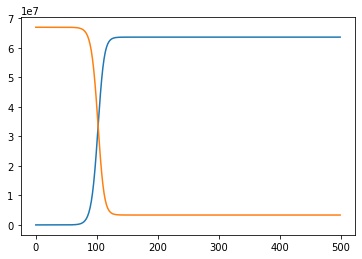

In [13]:
figure = plt.figure()
figure.canvas.set_window_title('SIS model')

plt.plot(inf, label='Infectes')

plt.plot(sus, label='Susceptibles')
#plt.legend(handles=[inf_line, sus_line])

#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

#plt.xlabel('Temps')
#plt.ylabel('Population')

plt.show()

In [14]:

def infections(Population, gamma, beta):
    S=Population-1
    I=1
    R=0
    sus = []
    inf = []
    rec = []
    for t in range (1, 100):
        S, S -(beta * S * I)/Population, I + ((beta * S * I)/Population) - R, gamma * I

        sus.append(S)
        inf.append(I)
        rec.append(R)


In [15]:
infections(1000, 0.1, 0.1)

In [16]:
inf

[1.1899999970143569,
 1.4160999922191158,
 1.6851589847535207,
 2.0053391833781773,
 2.38635361621361,
 2.8397607862919036,
 3.3793153116104193,
 4.021385186721036,
 4.785448323915591,
 5.694683437086788,
 6.776673193310606,
 8.06424096292904,
 9.596446551723272,
 11.419771121597492,
 13.589527245339802,
 16.171536870579985,
 19.244128095188977,
 22.900511327582382,
 27.251606914052037,
 32.42941001043387,
 38.590994772515124,
 45.92327933287965,
 54.648696109562074,
 65.03193945381562,
 77.38799532329885,
 92.0916965540025,
 109.58909357838075,
 130.41098550138838,
 155.18902196974565,
 184.67486423886703,
 219.76298661947607,
 261.51780988324526,
 311.2059895682609,
 370.33483842918463,
 440.6980482560764,
 524.4300975687519,
 624.0709949745788,
 742.6433212174494,
 883.7439056095851,
 1051.6529158783533,
 1251.463667852077,
 1489.2370887453235,
 1772.1855139668316,
 2108.8913847860513,
 2509.5674694781765,
 2986.3664853113805,
 3553.7494904069254,
 4228.92418749369,
 5032.3663884748

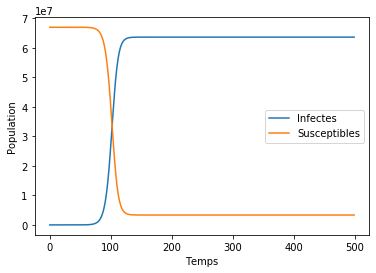

In [20]:
figure = plt.figure()

infectes, =plt.plot(inf, label='Infectes')
susceptibles, = plt.plot(sus, label='Susceptibles')
plt.legend(handles=[infectes, susceptibles])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.xlabel('Temps')
plt.ylabel('Population')

plt.show()